<a href="https://colab.research.google.com/github/freyaabbi/HR-Analytics-/blob/main/ml_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip show kaggle


Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [2]:
!mkdir ~/.kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"freyaabbi","key":"497badcb69497edb18f704f58ce5bb44"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d saadharoon27/hr-analytics-dataset

!unzip hr-analytics-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/saadharoon27/hr-analytics-dataset
License(s): CC0-1.0
  0% 0.00/55.0k [00:00<?, ?B/s]
100% 55.0k/55.0k [00:00<00:00, 55.1MB/s]
Archive:  hr-analytics-dataset.zip
  inflating: HR_Analytics.csv        


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('HR_Analytics.csv')
df.head()


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [8]:
print(df.columns)

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [20]:
#QUESTION 1
hr_salaries = df.loc[df['Department'] == 'Human Resources', 'SalarySlab']
marketing_salaries = df.loc[df['Department'] == 'Marketing', 'SalarySlab']


print(f"HR Salaries: {hr_salaries}")
print(f"Marketing Salaries: {marketing_salaries}")

if not hr_salaries.empty:
    hr_variance = np.var(hr_salaries)
    hr_std = np.std(hr_salaries)
    hr_iqr = np.percentile(hr_salaries, 75) - np.percentile(hr_salaries, 25)
    print(f'HR Department - Variance: {hr_variance}, Standard Deviation: {hr_std}, IQR: {hr_iqr}')
else:
    print("No data found for HR department.")

if not marketing_salaries.empty:
    marketing_variance = np.var(marketing_salaries)
    marketing_std = np.std(marketing_salaries)
    marketing_iqr = np.percentile(marketing_salaries, 75) - np.percentile(marketing_salaries, 25)
    print(f'Marketing Department - Variance: {marketing_variance}, Standard Deviation: {marketing_std}, IQR: {marketing_iqr}')
else:
    print("No data found for Marketing department.")



HR Salaries: 12      Upto 5k
93      Upto 5k
95      Upto 5k
120     Upto 5k
126     Upto 5k
         ...   
1399    10k-15k
1432       15k+
1440       15k+
1468       15k+
1470    Upto 5k
Name: SalarySlab, Length: 63, dtype: object
Marketing Salaries: Series([], Name: SalarySlab, dtype: object)


TypeError: could not convert string to float: 'Upto 5k'

In [16]:
#QUESTION TWO

unique_departments = df['Department'].unique()
print(unique_departments)

if 'IT' in unique_departments:
    print("The IT department is present in the dataset.")
else:
    print("The IT department is NOT present in the dataset.")

it_experience = df.loc[df['Department'] == 'IT', 'TotalWorkingYears']

if not it_experience.empty:
    experience_range = it_experience.max() - it_experience.min()
    print(f'Range of experience in IT Department: {experience_range}')
else:
    print("No data found for IT department.")




['Research & Development' 'Sales' 'Human Resources']
The IT department is NOT present in the dataset.
No data found for IT department.


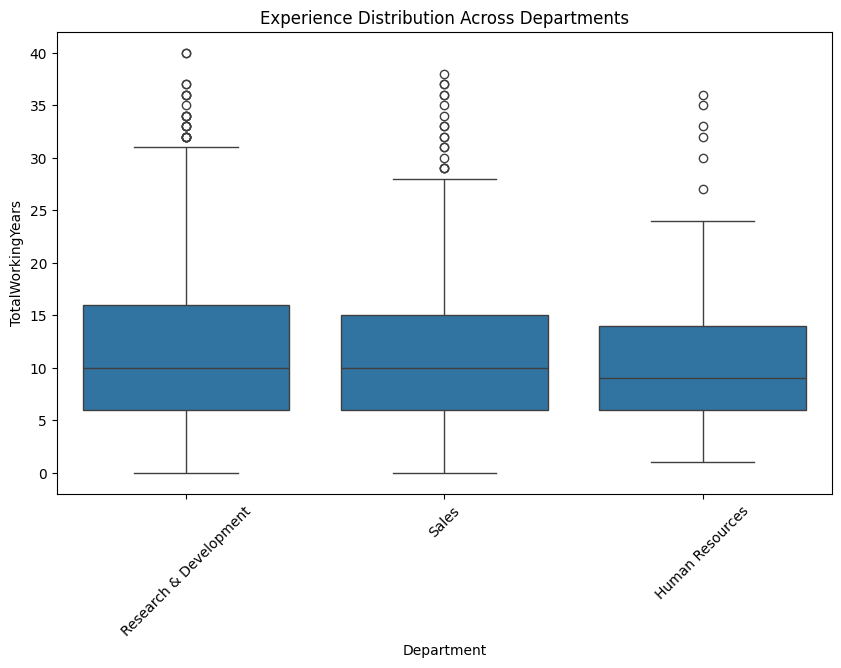

In [21]:
#QUESTION 3
plt.figure(figsize=(10,6))
sns.boxplot(x='Department', y='TotalWorkingYears', data=df)
plt.title('Experience Distribution Across Departments')
plt.xticks(rotation=45)
plt.show()


In [23]:
#QUESTION 4
# Calculate standard deviation for all numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
std_devs = df[numerical_columns].std()

# Identify the feature with the highest standard deviation
highest_std_feature = std_devs.idxmax()
highest_std_value = std_devs.max()

print(f'Feature with highest standard deviation: {highest_std_feature}, Value: {highest_std_value}')


Feature with highest standard deviation: MonthlyRate, Value: 7112.0568016419575
